<h1><center> Process Parameter Analysis </center></h1>

# Import Packages and Dataset

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
import math
import seaborn as sns
# Packages for processing and learning
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import griddata
import cv2
from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Change cell width to fullscreen (like colab)
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [2]:
# Import excel data
path = r'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper/Process Parameters and Properties LPBF - New.xlsx'
dataset = pd.read_excel(path)

# Change treatment title - optional
# dataset.rename(columns={'Treated (HIP/Y/N)':'Treatment Information'}, inplace=True)
dataset.rename(columns={'Cell Spacing':'Cell Spacing (um)'}, inplace=True)
dataset.rename(columns={'Treated (HIP/Y/N)':'Treatment Information'}, inplace=True)
column_names = dataset.columns
# Change (um) to correct scientific symbol
dataset.columns = [str.replace('(um)', '(\u03BCm)') for str in column_names]
dataset = dataset.replace(r'\s+', np.nan, regex =True)
dataset

/var/folders/dr/88_11bqj7nv1y6zj8hs35g3m0000gp/T/ipykernel_53325/3941205184.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace(r'\s+', np.nan, regex =True)


,Material,Author's \nLast Name,Year,Link to paper,Manufacturer,Model,Printing Method,Method,Powder Size \nDistribution (μm),Laser Power (W),...,Test Temerature (℃).1,Stress/Strain Control,Max Stress/Strain,R value,Fatigue Life (Cycles),Test Temerature (℃).2,Average Work Hardening,Surface Roughness (μm),Error.6,Average Grain Size (μm)
0,IN718,NaN,2014.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,LPBF,NaN,NaN,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IN718,NaN,2014.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,LPBF,NaN,NaN,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IN718,NaN,2014.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,LPBF,NaN,NaN,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IN718,NaN,2014.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,LPBF,NaN,NaN,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IN718,Lu,2015.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,LPBF,NaN,NaN,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,16.172107,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,316L,Yildiz,2024.0,https://doi.org/10.1016/j.mtcomm.2024.108168,NaN,NaN,LPBF,NaN,19-48,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.266667,NaN,NaN,NaN
4407,316L,Yildiz,2024.0,https://doi.org/10.1016/j.mtcomm.2024.108168,NaN,NaN,LPBF,NaN,19-48,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.525000,NaN,NaN,NaN
4408,316L,Yildiz,2024.0,https://doi.org/10.1016/j.mtcomm.2024.108168,NaN,NaN,LPBF,NaN,19-48,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.811111,NaN,NaN,NaN
4409,316L,Yildiz,2024.0,https://doi.org/10.1016/j.mtcomm.2024.108168,NaN,NaN,LPBF,NaN,19-48,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.627586,NaN,NaN,NaN


In [3]:
fontsize=25
column_names = dataset.columns
column_names

Index(['Material', 'Author's \nLast Name', 'Year', 'Link to paper',
       'Manufacturer', 'Model', 'Printing Method', 'Method',
       'Powder Size \nDistribution (μm)', 'Laser Power (W)',
       'Scanning Speed (mm/s)', 'Wire feeding speed (mm/min)',
       'Layer Thickness (μm)', 'Hatch Spacing (μm)', 'Beam size (μm)',
       'Focus Offset (mm)', 'Scanning strategy', 'layer rotation (degree)',
       'Island/Stripe size (mm)', 'Building Direction',
       'Build plate temperature (°C)', 'Width (μm)', 'Height (μm)',
       'Depth (μm)', 'Area', 'Linear energy density\n(J/m)',
       'Area energy density (J/mm2)', 'Volumetric energy density (J/mm3)',
       'Density measurement method', 'Consolidation (%)', 'Error',
       'Treatment Information', 'Temperature (°C)', 'Time (Hrs)',
       'Pressure (MPa)', 'Cooling', 'Temperature 2 (°C)', 'Time 2 (Hrs)',
       'Cooling.1', 'Temperature 3 (°C)', 'Time 3 (Hrs)', 'Cooling.2',
       'Temperature 4 (°C)', 'Time 4 (Hrs)', 'Cooling.3', 'Har

In [4]:
# Choose variables to consider (for input and output data)
x_var = ['Material',
         'Laser Power (W)',
         'Scanning Speed (mm/s)']

y_var = ['Yield Stress (MPa)',
        'Average Work Hardening',
        'Elongation (%)',
        'Consolidation (%)']

treat_var = ['Treatment Information']

# Obtains length of input and outputs
x_len = len(x_var)
y_len = len(y_var)
             
# List of process parameters to consider    
# 'Laser power (W)'
# 'Laser speed (mm/s)
# 'Layer thickness (um)'
# 'Hatch spacing (um)'
# 'Beam size (um)'

In [5]:
# Filter out data to specified materials
materials_list = ['316L', 'IN718', 'TI6Al4V', 'AlSi10Mg']
dataset = dataset[dataset['Material'].isin(materials_list)]
# Reset index
dataset = dataset.reset_index(drop=True)

# Replace N and NaN values for treatment information as As Built
dataset.loc[dataset['Treatment Information'] == 'N', 'Treatment Information'] = 'As Built'
dataset['Treatment Information'] = dataset['Treatment Information'].fillna('As Built')
# Replace other treatment information 
dataset['Treatment Information'] = dataset['Treatment Information'].replace(['Y', 'SR', 'y'], 'Heat Treated')
# Filter out rows with 'HIP' in 'Treatment Information' column
dataset = dataset[dataset['Treatment Information'] != 'HIP']
# Filter dataframe to relevant columns only
dataset_copy = dataset[x_var + y_var + treat_var].copy()

dataset_copy

,Material,Laser Power (W),Scanning Speed (mm/s),Yield Stress (MPa),Average Work Hardening,Elongation (%),Consolidation (%),Treatment Information
0,IN718,110.0,600.0,NaN,NaN,NaN,74.50,As Built
1,IN718,110.0,400.0,NaN,NaN,NaN,87.00,As Built
2,IN718,120.0,400.0,NaN,NaN,NaN,92.00,As Built
3,IN718,130.0,400.0,NaN,NaN,NaN,98.40,As Built
4,IN718,180.0,600.0,804.0,16.172107,16.85,98.67,As Built
...,...,...,...,...,...,...,...,...
2687,316L,350.0,1700.0,366.9,3.266667,48.00,98.08,As Built
2688,316L,100.0,1700.0,137.2,3.525000,8.00,80.99,As Built
2689,316L,200.0,1700.0,315.9,1.811111,9.00,92.21,As Built
2690,316L,350.0,1400.0,398.8,2.627586,58.00,99.27,As Built


# Plot Maps for seperated Materials

### Preprocessing Data

In [6]:
def iterative_imputer(data_impute):
    '''Set custom iterative imputer to impute interested columns and return back as a dataframe.'''
    # Fit the imputer on training data for as built
    imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), max_iter=50, random_state=42)
    data_imputed = data_impute.copy().reset_index(drop=True)
    data_tmp = data_impute.copy()
    data_tmp = data_tmp.drop(columns = ['Material', 'Treatment Information'])
    imputer.fit(data_tmp)
    # Impute missing values for as built
    imputed_data = imputer.transform(data_tmp)
    # Get feature names and put back into dataframe and join material and treatment information
    feature_names = imputer.get_feature_names_out(data_tmp.columns)
    imputed_data = pd.DataFrame(imputed_data, columns=feature_names)
    # imputed_data = imputed_data[(imputed_data >= 0).all(axis=1)]
    for var in y_var:
        data_imputed[var] = imputed_data[var]

    # return data_impute
    return data_imputed

In [7]:
# Filter data to specified materials and interested treatment information
dataset = dataset_copy.copy()

# Store original sizes of data for reference
total_data = len(dataset)

# Dropna for method
dataset_combined = dataset.dropna()

# Iterative impute missing values as majority has multiple values but may be missing 1 property
# dataset = iterative_imputer(dataset).dropna()

# Save this data to dict
mat_dict_nt = {}
mat_dict_ht = {}
for material in materials_list:
    mat_dict_nt[f'material'] = dataset_combined[dataset_combined['Material'] == material]


dropped_data = len(dataset_combined)

print(f'Total data = {total_data}')
print(f'Data after dropna = {dropped_data}')

Total data = 2574
Data after dropna = 633


In [8]:
dataset_combined

,Material,Laser Power (W),Scanning Speed (mm/s),Yield Stress (MPa),Average Work Hardening,Elongation (%),Consolidation (%),Treatment Information
4,IN718,180.0,600.0,804.0,16.172107,16.85,98.67,As Built
5,IN718,180.0,600.0,800.5,13.040380,21.05,98.85,As Built
6,IN718,180.0,600.0,770.5,13.154362,22.35,99.10,As Built
7,IN718,180.0,600.0,772.5,11.584158,25.25,99.12,As Built
26,IN718,250.0,700.0,668.0,15.590909,22.00,99.89,As Built
...,...,...,...,...,...,...,...,...
2687,316L,350.0,1700.0,366.9,3.266667,48.00,98.08,As Built
2688,316L,100.0,1700.0,137.2,3.525000,8.00,80.99,As Built
2689,316L,200.0,1700.0,315.9,1.811111,9.00,92.21,As Built
2690,316L,350.0,1400.0,398.8,2.627586,58.00,99.27,As Built


### Define Function - Change values in function to control plot

In [415]:
# Use to control x y limits
def combined_process(n, kernel, Gauss, x1_lim, x2_lim, y1_lim, y2_lim, level, grid_points, method, material, c1, c2):

    i=1
    j=0
    # Number of contour levles for the heat map
    levels = level
    # Gaussian blur kernal
    sf_nt = kernel
    # Number of points on the grid
    z_grid = grid_points
    EXTENDS="neither"
    lwidth=0.8
    figsize = (22,18)
    cmap = sns.color_palette("mako", as_cmap=True)

    mat_df = dataset_combined[dataset_combined['Material']== material]

    # Filter to differentiate for scatter
    AB_data = mat_df[mat_df['Treatment Information'] == 'As Built']
    HT_data = mat_df[mat_df['Treatment Information'] == 'Heat Treated']

    x_nt = mat_df['Scanning Speed (mm/s)'].tolist()
    y_nt = mat_df['Laser Power (W)'].tolist()
    z1_nt = mat_df[y_var[0]].tolist()
    z2_nt = mat_df[y_var[1]].tolist()
    z3_nt = mat_df[y_var[2]].tolist()
    z4_nt = mat_df[y_var[3]].tolist()

    max_x = np.max(x_nt)
    min_x = np.min(x_nt)

    max_y = np.max(y_nt)
    min_y = np.min(y_nt)

    max_z = np.max(z1_nt)
    min_z = np.min(z1_nt)

    max2_z = np.max(z2_nt)
    min2_z = np.min(z2_nt)

    max3_z = np.max(z3_nt)
    min3_z = np.min(z3_nt)

    max4_z = np.max(z4_nt)
    min4_z = np.min(z4_nt)

    max_x = round(max_x/10)*10
    min_x = round(min_x/10)*10
    max_y = round(max_y/10)*10
    min_y = round(min_y/10)*10
    max_z = round(max_z/10)*10
    min_z = round(min_z/10)*10
    max2_z = round(max2_z/10)*10
    min2_z = round(min2_z/10)*10
    max3_z = round(max3_z/10)*10
    min3_z = math.floor(min3_z/10)*10
    max4_z = round(max4_z/10)*10
    min4_z = math.floor(min4_z/10)*10

    # Manually edit limits
    # min_z = 200
    # max_z = 1200
    min2_z = 0
    max2_z = 50
    min3_z = 0
    max3_z = 100
    min4_z = 90
    max4_z = 100

    # Create gridpoints so each space has a datapoint for interpolation
    x = np.linspace(min_x, max_x, z_grid)
    y = np.linspace(min_y, max_y, z_grid)
    xx, yy = np.meshgrid(x, y)



    # As Built Maps       
    # griddata to interpolate z data - method specifies type, can be nearest, linear, cubic etc.
    zi1_nt = griddata((x_nt, y_nt), z1_nt, (xx, yy), method=method)
    # Same process for z2 (average work hardening)
    zi2_nt = griddata((x_nt, y_nt), z2_nt, (xx, yy), method=method)
    # Same process for z3 (elongation)
    zi3_nt = griddata((x_nt, y_nt), z3_nt, (xx, yy), method=method)
    # Same process for z4 (density consolidation)
    zi4_nt = griddata((x_nt, y_nt), z4_nt, (xx, yy), method=method)

    # Apply GaussianBlur
    if Gauss == True:
        zi1_nt = cv2.GaussianBlur(zi1_nt,(sf_nt,sf_nt),0)
        zi2_nt = cv2.GaussianBlur(zi2_nt,(sf_nt,sf_nt),0)
        zi3_nt = cv2.GaussianBlur(zi3_nt,(sf_nt,sf_nt),0)
        zi4_nt = cv2.GaussianBlur(zi4_nt,(sf_nt,sf_nt),0)
    else:
        pass

    # Plot first heatmap
    fig1 = plt.figure(figsize=figsize)
    ax1_nt = fig1.add_subplot(221)
    cs = ax1_nt.contourf(xx, yy, zi1_nt, levels = levels, extend=EXTENDS, corner_mask=True, cmap=cmap, vmin=min_z, vmax=max_z)
    ax1_nt.set_xlim([x1_lim, x2_lim])
    ax1_nt.set_ylim([y1_lim, y2_lim])
    # Set colorbar
    cbar = fig1.colorbar(cs, label=(f'{y_var[j]}'), ax=ax1_nt)
    cbar.set_label(labelpad=18, label=(f'{y_var[j]}'), weight='bold')
    cbar.set_ticks([int(val) for val in np.linspace(min_z, max_z, 5)])  # Set colourbar ticks
    cbar.set_ticklabels([int(val) for val in np.linspace(min_z, max_z, 5)])
    cbar.ax.set_ylim(min_z, max_z)

    # Plot second heatmap
    j = j+1
    ax2_nt = fig1.add_subplot(222)
    cs = ax2_nt.contourf(xx, yy, zi2_nt, levels = levels, extend='max', corner_mask=True, cmap=cmap)
    ax2_nt.set_xlim([x1_lim, x2_lim])
    ax2_nt.set_ylim([y1_lim, y2_lim])
    # Set colorbar
    cbar = fig1.colorbar(cs, label=(f'{y_var[j]}'), ax=ax2_nt)
    cbar.set_label(labelpad=18+13, label=(f'{y_var[j]}'), weight='bold')
    # cbar.set_ticks([int(val) for val in np.linspace(min2_z, max2_z, 5)])  # Set colourbar ticks
    # cbar.set_ticklabels([int(val) for val in np.linspace(min2_z, max2_z, 5)])
    cbar.ax.set_ylim(min2_z, max2_z)

    # Plot third heatmap
    j = j+1
    ax3_nt = fig1.add_subplot(223)
    cs = ax3_nt.contourf(xx, yy, zi3_nt, levels = levels, extend='neither', corner_mask=True, cmap=cmap, vmin=min3_z, vmax=max3_z)
    ax3_nt.set_xlim([x1_lim, x2_lim])
    ax3_nt.set_ylim([y1_lim, y2_lim])
    # Set colorbar
    cbar = fig1.colorbar(cs, label=(f'{y_var[j]}'), ax=ax3_nt)
    cbar.set_label(labelpad=18, label=(f'{y_var[j]}'), weight='bold')
    cbar.set_ticks([int(val) for val in np.linspace(min3_z, max3_z, 6)])  # Set colourbar ticks
    cbar.set_ticklabels([int(val) for val in np.linspace(min3_z, max3_z, 6)])
    cbar.ax.set_ylim(min3_z, max3_z)

    # Plot fourth heatmap
    j = j+1
    ax4_nt = fig1.add_subplot(224)
    cs = ax4_nt.contourf(xx, yy, zi4_nt, levels = levels, extend=EXTENDS, corner_mask=True, cmap=cmap, vmin=min4_z, vmax=max4_z)
    ax4_nt.set_xlim([x1_lim, x2_lim])
    ax4_nt.set_ylim([y1_lim, y2_lim])
    # Set colorbar
    cbar = fig1.colorbar(cs, label=(f'{y_var[j]}'), ax=ax4_nt)
    cbar.set_label(labelpad=18+5, label=(f'{y_var[j]}'), weight='bold')
    cbar.set_ticks([int(val) for val in np.linspace(min4_z, max4_z, 6)])  # Set colourbar ticks
    cbar.set_ticklabels([int(val) for val in np.linspace(min4_z, max4_z, 6)])
    cbar.ax.set_ylim(min4_z, max4_z)

    fig1.suptitle(f'{materials_list[n]}', fontsize=fontsize+8, y=0.9, weight='bold')

    # Change units
    x_vars = x_var
    y_vars = y_var
    superscript_minus_one = "\u207B\u00B9"
    x_vars = [str.replace('(um)', '(\u03BCm)') for str in x_vars]
    x_vars = [item.replace("(mm/s)", f"(mm s{superscript_minus_one})") for item in x_vars]

    y_vars = [str.replace('(um)', '(\u03BCm)') for str in y_var]
    y_vars = [item.replace("(mm/s)", f"(mm s{superscript_minus_one})") for item in y_vars]

    # Set x, y axis titles
    ax1_nt.set_xlabel(x_vars[i+1], labelpad=8, weight='bold')
    ax1_nt.set_ylabel(x_vars[i], labelpad=8, weight='bold')
    ax2_nt.set_xlabel(x_vars[i+1], labelpad=8, weight='bold')
    ax2_nt.set_ylabel(x_vars[i], labelpad=8, weight='bold')
    ax3_nt.set_xlabel(x_vars[i+1], labelpad=8, weight='bold')
    ax3_nt.set_ylabel(x_vars[i], labelpad=8, weight='bold')
    ax4_nt.set_xlabel(x_vars[i+1], labelpad=8, weight='bold')
    ax4_nt.set_ylabel(x_vars[i], labelpad=8, weight='bold')



    # Combined process windows for As Built
    # Normalise data - with addition of both arrays, true maximum of both stress and elongation will be highlighted
    # https://stackoverflow.com/questions/65964387/how-to-normalize-2d-array-with-sklearn

    # Reshaping allows normalisation on entire 2D array
    scaler = MinMaxScaler()
    zi1_nt_1d = zi1_nt.reshape([-1,1])
    norm_zi1_nt = scaler.fit_transform(zi1_nt_1d)
    zi1_nt = norm_zi1_nt.reshape(zi1_nt.shape)
    # Normalise for second set of data
    scaler = MinMaxScaler()
    zi2_nt_1d = zi2_nt.reshape([-1,1])
    norm_zi2_nt = scaler.fit_transform(zi2_nt_1d)
    zi2_nt = norm_zi2_nt.reshape(zi2_nt.shape)
    # Normalise for third set of data
    scaler = MinMaxScaler()
    zi3_nt_1d = zi3_nt.reshape([-1,1])
    norm_zi3_nt = scaler.fit_transform(zi3_nt_1d)
    zi3_nt = norm_zi3_nt.reshape(zi3_nt.shape)
    # Normalise for fourth set of data
    scaler = MinMaxScaler()
    zi4_nt_1d = zi4_nt.reshape([-1,1])
    norm_zi4_nt = scaler.fit_transform(zi4_nt_1d)
    zi4_nt = norm_zi4_nt.reshape(zi4_nt.shape)

    # Add all normalised arrays together
    norm_all_nt = np.array([zi1_nt, zi2_nt, zi3_nt, zi4_nt])
    norm_all_nt = norm_all_nt.sum(axis=0)

    # Normalise again for ease of comparison
    scaler = MinMaxScaler()
    norm_all_nt = scaler.fit_transform(norm_all_nt)
    
    
    fig2 = plt.figure(figsize=(11, 9))
    ax2 = fig2.add_subplot(111)
    cs = ax2.contourf(xx, yy, norm_all_nt, levels = levels, extend=EXTENDS, corner_mask=True, cmap=cmap)
    # ax2.contour(cs, colors='k', linewidths=lwidth)
    ticks=np.linspace(0,1,11)
    cbar = fig2.colorbar(cs, ax=ax2, ticks=ticks)
    # Extend tick length
    cbar.ax.tick_params(pad=10, width=2, length=10)
    # Uncomment this line to show individual data points
    plt.suptitle(f'{materials_list[n]}', fontsize=f_size+5, y=0.95, weight='bold')
    # Set x, y axis titles
    ax2.set_xlabel(x_vars[i+1], labelpad=8+10, weight='bold')
    ax2.set_ylabel(x_vars[i], labelpad=8+10, weight='bold')
    ax2.set_xlim([x1_lim, x2_lim])
    ax2.set_ylim([y1_lim, y2_lim])
    ax2.tick_params(axis='both', which='major', pad=10, width=2, length=10)

    axes = [ax1_nt, ax2_nt, ax3_nt, ax4_nt]
    for ax in axes:
        ax.scatter(AB_data['Scanning Speed (mm/s)'], AB_data['Laser Power (W)'], marker='o', color=c1, s=m_size, alpha=alpha, edgecolors='black', zorder=2)
        ax.scatter(HT_data['Scanning Speed (mm/s)'], HT_data['Laser Power (W)'], marker='D', color=c2, s=125, alpha=alpha, edgecolors='black', zorder=1)

    ax2.scatter(AB_data['Scanning Speed (mm/s)'], AB_data['Laser Power (W)'], marker='o', color=c1, s=m_size, alpha=alpha, edgecolors='black', zorder=2)
    ax2.scatter(HT_data['Scanning Speed (mm/s)'], HT_data['Laser Power (W)'], marker='D', color=c2, s=125, alpha=alpha, edgecolors='black', zorder=1)

    fig1.subplots_adjust(left = 0.1, top = 0.85, right = 0.9, bottom = 0.1, hspace = 0.3, wspace = 0.3)
    fig2.subplots_adjust(left = 0.1, top = 0.85, right = 0.9, bottom = 0.1, hspace = 0.3, wspace = 0.3)

    # fig1.savefig(f'Figures/Process Maps/All_{material}.png',dpi=300, bbox_inches = "tight")
    # fig2.savefig(f'Figures/Process Maps/All_Combined_{material}.png',dpi=300, bbox_inches = "tight")

### Plot Heatmaps - Read notes about n and sf

/Users/rww21/miniforge3/envs/EDA/lib/python3.9/site-packages/sklearn/utils/_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/Users/rww21/miniforge3/envs/EDA/lib/python3.9/site-packages/sklearn/utils/_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


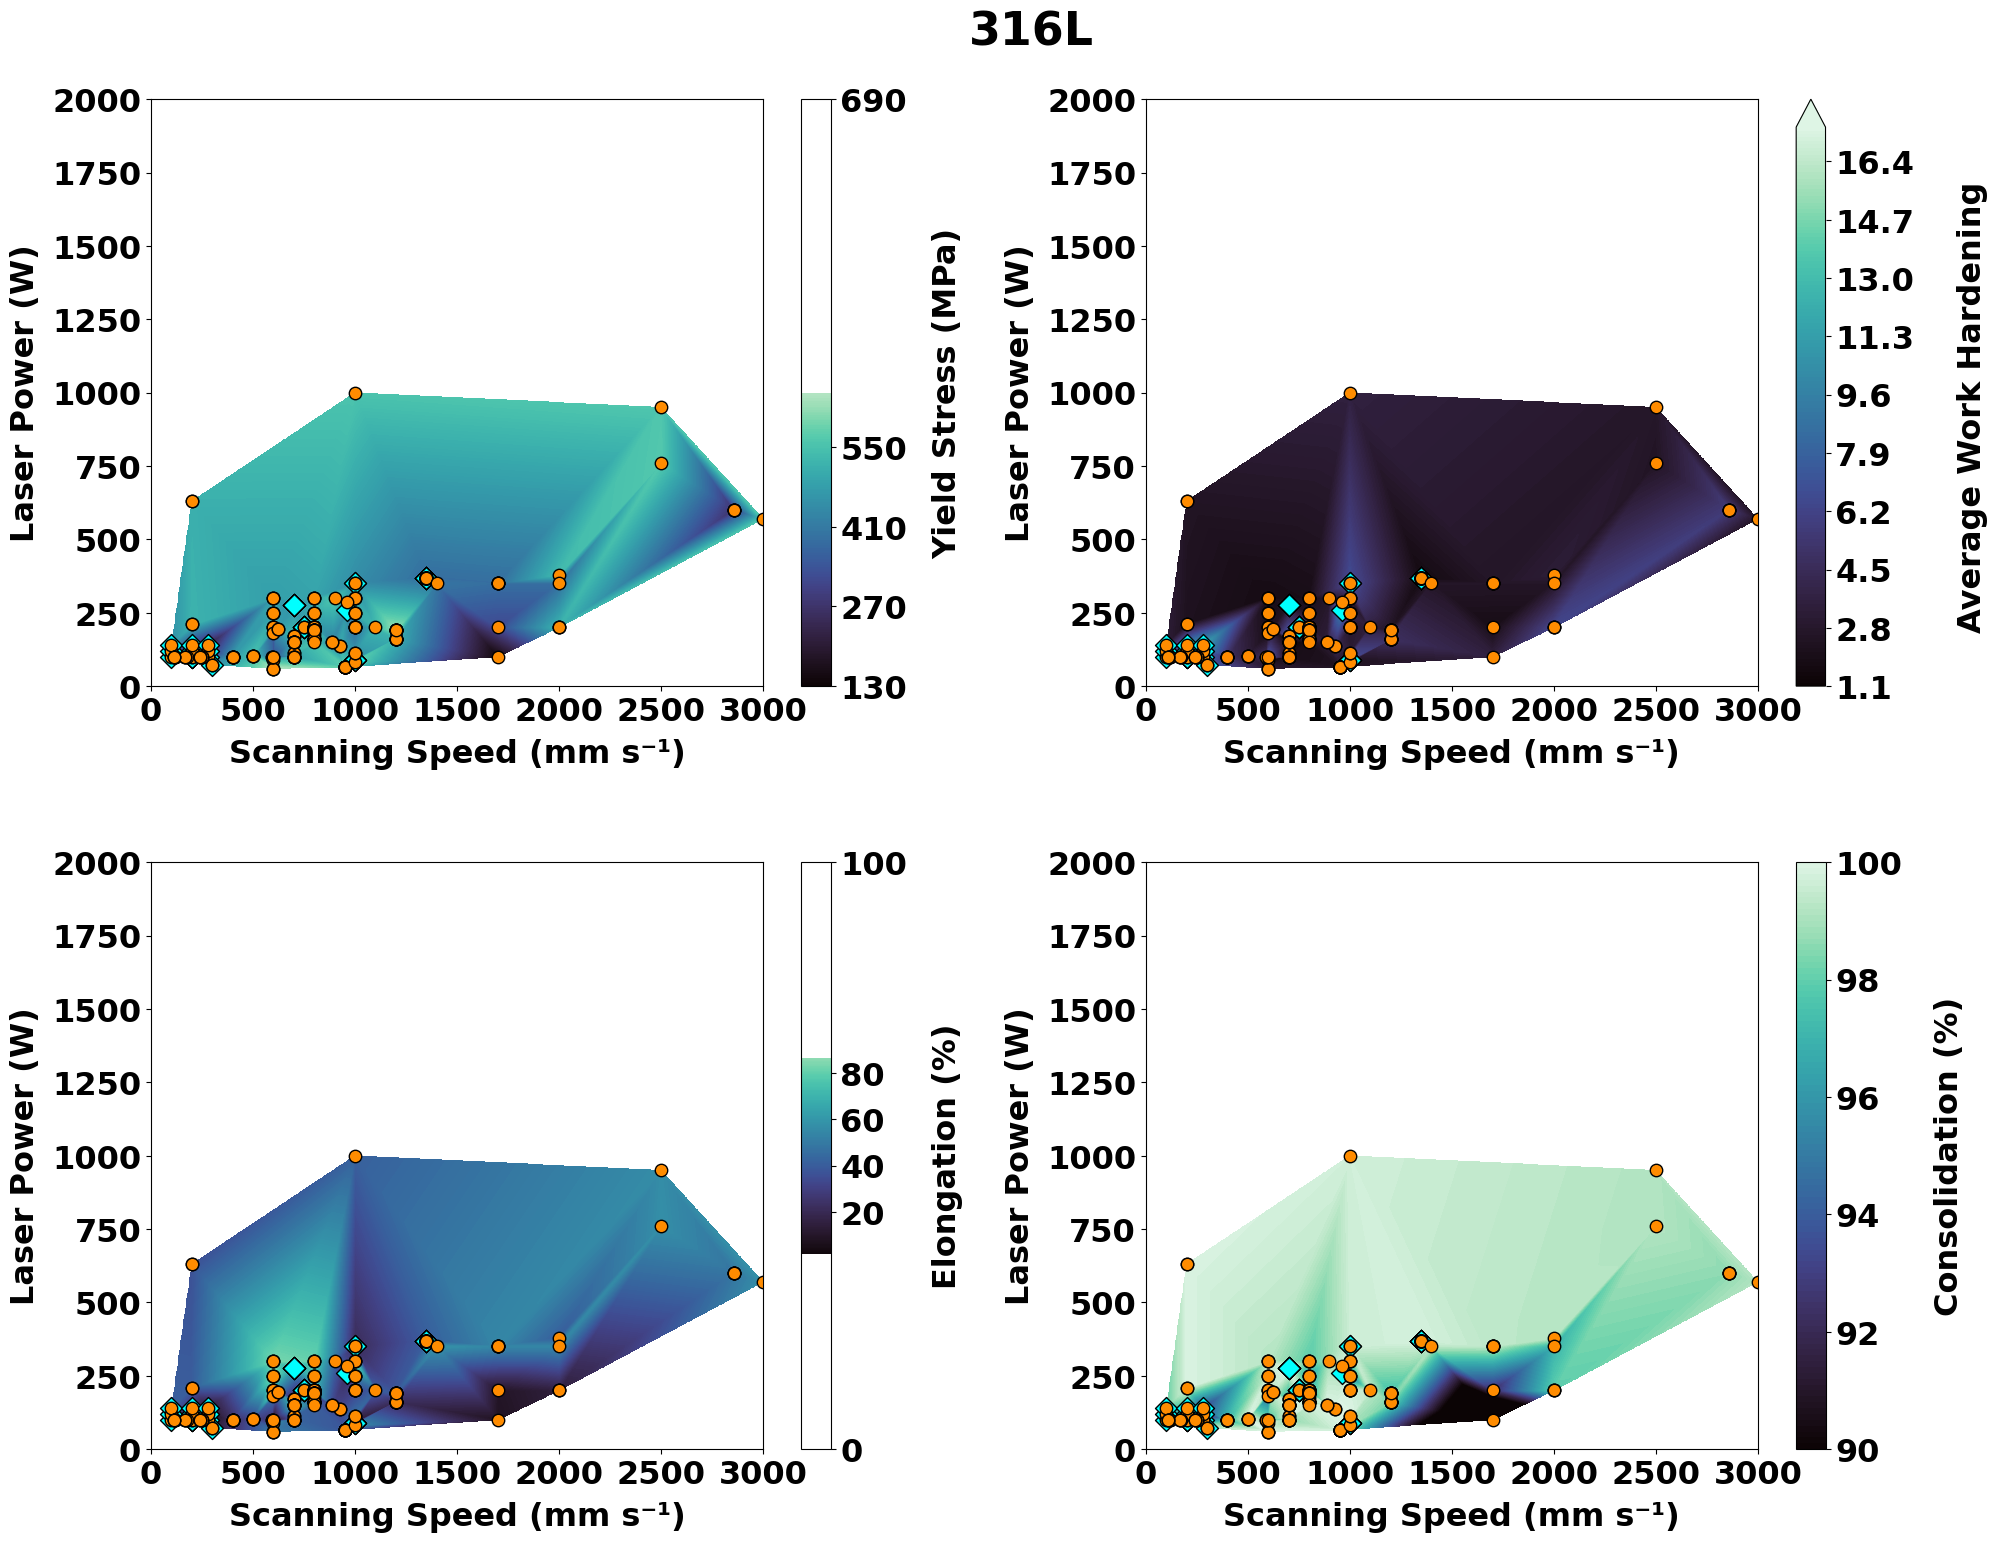

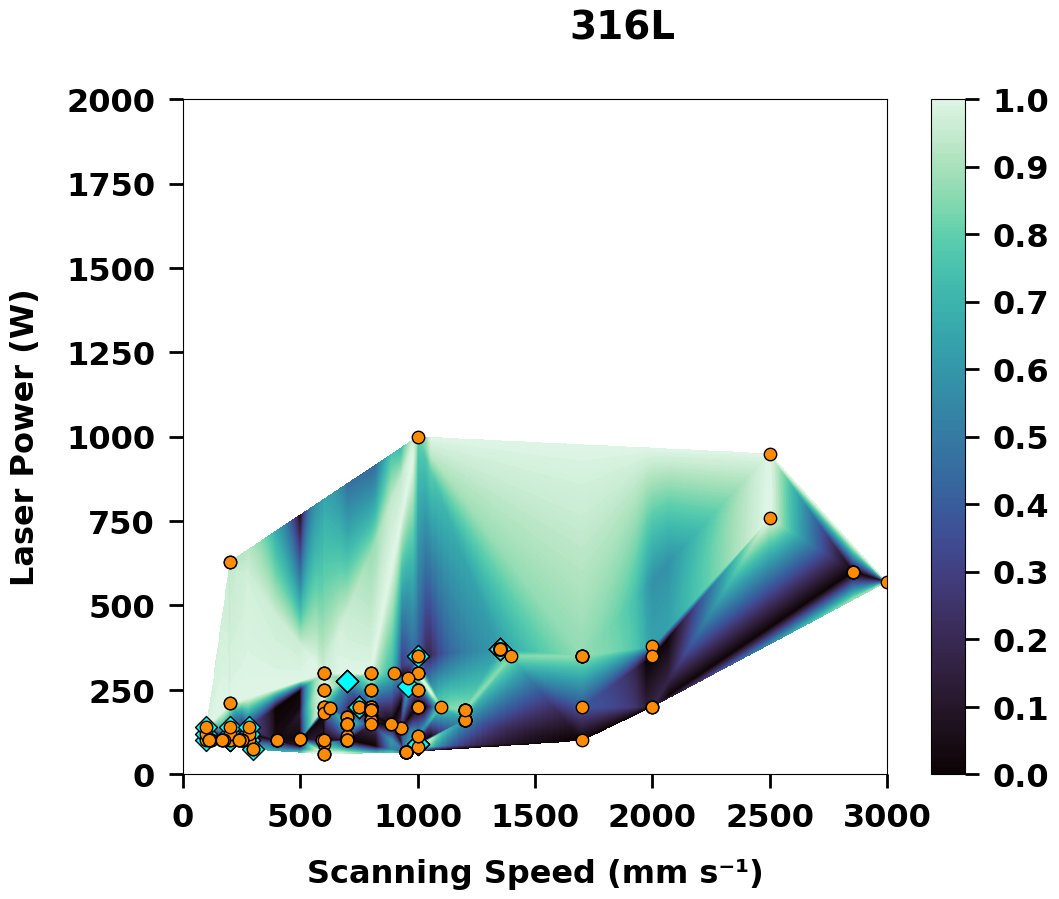

In [416]:
# Uses linear barycentric interpolation
method='linear'
# Number of contour levles for the heat map
level = 200
# Number of points on the grid
grid_points = 800
# Change sf_nt for non-treated Gaussian blur and sf_ht for heat treated Gaussian blur
gauss_cond = False
kernel = 7
# Change x y limits
x1_lim = 0
x2_lim = 3000
y1_lim = 0
y2_lim = 2000
f_size = 23
m_size = 80
alpha = 1
plt.rcParams.update({'font.size': f_size})
from matplotlib import rc,rcParams
rc('font', weight='bold')
# rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

# Iterate for all materials
# for n in range(len(materials_list)):
#     combined_process(n, kernel, gauss_cond, x1_lim, x2_lim, y1_lim, y2_lim, level, grid_points, method, material=materials_list[n], c1='darkorange', c2='cyan')

n = 0
combined_process(n, kernel, gauss_cond, x1_lim, x2_lim, y1_lim, y2_lim, level, grid_points, method, material=materials_list[n], c1='darkorange', c2='cyan')

In [417]:
# Use to control x y limits
def combined_process(n, kernel, Gauss, x1_lim, x2_lim, y1_lim, y2_lim, level, grid_points, method, material, c1, c2):

    i=1
    j=0
    # Number of contour levles for the heat map
    levels = level
    # Gaussian blur kernal
    sf_nt = kernel
    # Number of points on the grid
    z_grid = grid_points
    EXTENDS="neither"
    lwidth=0.8
    figsize = (22,18)
    cmap = sns.color_palette("mako", as_cmap=True)

    mat_df = dataset_combined[dataset_combined['Material']== material]

    # Filter to differentiate for scatter
    AB_data = mat_df[mat_df['Treatment Information'] == 'As Built']
    HT_data = mat_df[mat_df['Treatment Information'] == 'Heat Treated']

    x_nt = mat_df['Scanning Speed (mm/s)'].tolist()
    y_nt = mat_df['Laser Power (W)'].tolist()
    z1_nt = mat_df[y_var[0]].tolist()
    z2_nt = mat_df[y_var[1]].tolist()
    z3_nt = mat_df[y_var[2]].tolist()
    z4_nt = mat_df[y_var[3]].tolist()

    max_x = np.max(x_nt)
    min_x = np.min(x_nt)

    max_y = np.max(y_nt)
    min_y = np.min(y_nt)

    max_z = np.max(z1_nt)
    min_z = np.min(z1_nt)

    max2_z = np.max(z2_nt)
    min2_z = np.min(z2_nt)

    max3_z = np.max(z3_nt)
    min3_z = np.min(z3_nt)

    max4_z = np.max(z4_nt)
    min4_z = np.min(z4_nt)

    max_x = round(max_x/10)*10
    min_x = round(min_x/10)*10
    max_y = round(max_y/10)*10
    min_y = round(min_y/10)*10
    max_z = round(max_z/10)*10
    min_z = round(min_z/10)*10
    max2_z = round(max2_z/10)*10
    min2_z = round(min2_z/10)*10
    max3_z = round(max3_z/10)*10
    min3_z = math.floor(min3_z/10)*10
    max4_z = round(max4_z/10)*10
    min4_z = math.floor(min4_z/10)*10

    # Manually edit limits
    # min_z = 200
    # max_z = 1200
    # min2_z = 0
    # max2_z = 200
    min3_z = 0
    max3_z = 20
    min4_z = 90
    max4_z = 100

    # Create gridpoints so each space has a datapoint for interpolation
    x = np.linspace(min_x, max_x, z_grid)
    y = np.linspace(min_y, max_y, z_grid)
    xx, yy = np.meshgrid(x, y)



    # As Built Maps       
    # griddata to interpolate z data - method specifies type, can be nearest, linear, cubic etc.
    zi1_nt = griddata((x_nt, y_nt), z1_nt, (xx, yy), method=method)
    # Same process for z2 (average work hardening)
    zi2_nt = griddata((x_nt, y_nt), z2_nt, (xx, yy), method=method)
    # Same process for z3 (elongation)
    zi3_nt = griddata((x_nt, y_nt), z3_nt, (xx, yy), method=method)
    # Same process for z4 (density consolidation)
    zi4_nt = griddata((x_nt, y_nt), z4_nt, (xx, yy), method=method)

    # Apply GaussianBlur
    if Gauss == True:
        zi1_nt = cv2.GaussianBlur(zi1_nt,(sf_nt,sf_nt),0)
        zi2_nt = cv2.GaussianBlur(zi2_nt,(sf_nt,sf_nt),0)
        zi3_nt = cv2.GaussianBlur(zi3_nt,(sf_nt,sf_nt),0)
        zi4_nt = cv2.GaussianBlur(zi4_nt,(sf_nt,sf_nt),0)
    else:
        pass

    # Plot first heatmap
    fig1 = plt.figure(figsize=figsize)
    ax1_nt = fig1.add_subplot(221)
    cs = ax1_nt.contourf(xx, yy, zi1_nt, levels = levels, extend=EXTENDS, corner_mask=True, cmap=cmap, vmin=min_z, vmax=max_z)
    ax1_nt.set_xlim([x1_lim, x2_lim])
    ax1_nt.set_ylim([y1_lim, y2_lim])
    # Set colorbar
    cbar = fig1.colorbar(cs, label=(f'{y_var[j]}'), ax=ax1_nt)
    cbar.set_label(labelpad=18, label=(f'{y_var[j]}'), weight='bold')
    cbar.set_ticks([int(val) for val in np.linspace(min_z, max_z, 5)])  # Set colourbar ticks
    cbar.set_ticklabels([int(val) for val in np.linspace(min_z, max_z, 5)])
    cbar.ax.set_ylim(min_z, max_z)

    # Plot second heatmap
    j = j+1
    ax2_nt = fig1.add_subplot(222)
    cs = ax2_nt.contourf(xx, yy, zi2_nt, levels = levels, extend='max', corner_mask=True, cmap=cmap)
    ax2_nt.set_xlim([x1_lim, x2_lim])
    ax2_nt.set_ylim([y1_lim, y2_lim])
    # Set colorbar
    cbar = fig1.colorbar(cs, label=(f'{y_var[j]}'), ax=ax2_nt)
    cbar.set_label(labelpad=18+13, label=(f'{y_var[j]}'), weight='bold')
    # cbar.set_ticks([int(val) for val in np.linspace(min2_z, max2_z, 5)])  # Set colourbar ticks
    # cbar.set_ticklabels([int(val) for val in np.linspace(min2_z, max2_z, 5)])
    cbar.ax.set_ylim(min2_z, max2_z)

    # Plot third heatmap
    j = j+1
    ax3_nt = fig1.add_subplot(223)
    cs = ax3_nt.contourf(xx, yy, zi3_nt, levels = levels, extend='neither', corner_mask=True, cmap=cmap, vmin=min3_z, vmax=max3_z)
    ax3_nt.set_xlim([x1_lim, x2_lim])
    ax3_nt.set_ylim([y1_lim, y2_lim])
    # Set colorbar
    cbar = fig1.colorbar(cs, label=(f'{y_var[j]}'), ax=ax3_nt)
    cbar.set_label(labelpad=18, label=(f'{y_var[j]}'), weight='bold')
    cbar.set_ticks([int(val) for val in np.linspace(min3_z, max3_z, 6)])  # Set colourbar ticks
    cbar.set_ticklabels([int(val) for val in np.linspace(min3_z, max3_z, 6)])
    cbar.ax.set_ylim(min3_z, max3_z)

    # Plot fourth heatmap
    j = j+1
    ax4_nt = fig1.add_subplot(224)
    cs = ax4_nt.contourf(xx, yy, zi4_nt, levels = levels, extend=EXTENDS, corner_mask=True, cmap=cmap, vmin=min4_z, vmax=max4_z)
    ax4_nt.set_xlim([x1_lim, x2_lim])
    ax4_nt.set_ylim([y1_lim, y2_lim])
    # Set colorbar
    cbar = fig1.colorbar(cs, label=(f'{y_var[j]}'), ax=ax4_nt)
    cbar.set_label(labelpad=18+5, label=(f'{y_var[j]}'), weight='bold')
    cbar.set_ticks([int(val) for val in np.linspace(min4_z, max4_z, 6)])  # Set colourbar ticks
    cbar.set_ticklabels([int(val) for val in np.linspace(min4_z, max4_z, 6)])
    cbar.ax.set_ylim(min4_z, max4_z)

    fig1.suptitle(f'{materials_list[n]}', fontsize=fontsize+8, y=0.9, weight='bold')

    # Change units
    x_vars = x_var
    y_vars = y_var
    superscript_minus_one = "\u207B\u00B9"
    x_vars = [str.replace('(um)', '(\u03BCm)') for str in x_vars]
    x_vars = [item.replace("(mm/s)", f"(mm s{superscript_minus_one})") for item in x_vars]

    y_vars = [str.replace('(um)', '(\u03BCm)') for str in y_var]
    y_vars = [item.replace("(mm/s)", f"(mm s{superscript_minus_one})") for item in y_vars]

    # Set x, y axis titles
    ax1_nt.set_xlabel(x_vars[i+1], labelpad=8, weight='bold')
    ax1_nt.set_ylabel(x_vars[i], labelpad=8, weight='bold')
    ax2_nt.set_xlabel(x_vars[i+1], labelpad=8, weight='bold')
    ax2_nt.set_ylabel(x_vars[i], labelpad=8, weight='bold')
    ax3_nt.set_xlabel(x_vars[i+1], labelpad=8, weight='bold')
    ax3_nt.set_ylabel(x_vars[i], labelpad=8, weight='bold')
    ax4_nt.set_xlabel(x_vars[i+1], labelpad=8, weight='bold')
    ax4_nt.set_ylabel(x_vars[i], labelpad=8, weight='bold')



    # Combined process windows for As Built
    # Normalise data - with addition of both arrays, true maximum of both stress and elongation will be highlighted
    # https://stackoverflow.com/questions/65964387/how-to-normalize-2d-array-with-sklearn

    # Reshaping allows normalisation on entire 2D array
    scaler = MinMaxScaler()
    zi1_nt_1d = zi1_nt.reshape([-1,1])
    norm_zi1_nt = scaler.fit_transform(zi1_nt_1d)
    zi1_nt = norm_zi1_nt.reshape(zi1_nt.shape)
    # Normalise for second set of data
    scaler = MinMaxScaler()
    zi2_nt_1d = zi2_nt.reshape([-1,1])
    norm_zi2_nt = scaler.fit_transform(zi2_nt_1d)
    zi2_nt = norm_zi2_nt.reshape(zi2_nt.shape)
    # Normalise for third set of data
    scaler = MinMaxScaler()
    zi3_nt_1d = zi3_nt.reshape([-1,1])
    norm_zi3_nt = scaler.fit_transform(zi3_nt_1d)
    zi3_nt = norm_zi3_nt.reshape(zi3_nt.shape)
    # Normalise for fourth set of data
    scaler = MinMaxScaler()
    zi4_nt_1d = zi4_nt.reshape([-1,1])
    norm_zi4_nt = scaler.fit_transform(zi4_nt_1d)
    zi4_nt = norm_zi4_nt.reshape(zi4_nt.shape)

    # Add all normalised arrays together
    norm_all_nt = np.array([zi1_nt, zi2_nt, zi3_nt, zi4_nt])
    norm_all_nt = norm_all_nt.sum(axis=0)

    # Normalise again for ease of comparison
    scaler = MinMaxScaler()
    norm_all_nt = scaler.fit_transform(norm_all_nt)
    
    
    fig2 = plt.figure(figsize=(11, 9))
    ax2 = fig2.add_subplot(111)
    cs = ax2.contourf(xx, yy, norm_all_nt, levels = levels, extend=EXTENDS, corner_mask=True, cmap=cmap)
    # ax2.contour(cs, colors='k', linewidths=lwidth)
    ticks=np.linspace(0,1,11)
    cbar = fig2.colorbar(cs, ax=ax2, ticks=ticks)
    # Extend tick length
    cbar.ax.tick_params(pad=10, width=2, length=10)
    # Uncomment this line to show individual data points
    plt.suptitle(f'{materials_list[n]}', fontsize=f_size+5, y=0.95, weight='bold')
    # Set x, y axis titles
    ax2.set_xlabel(x_vars[i+1], labelpad=8+10, weight='bold')
    ax2.set_ylabel(x_vars[i], labelpad=8+10, weight='bold')
    ax2.set_xlim([x1_lim, x2_lim])
    ax2.set_ylim([y1_lim, y2_lim])
    ax2.tick_params(axis='both', which='major', pad=10, width=2, length=10)

    axes = [ax1_nt, ax2_nt, ax3_nt, ax4_nt]
    for ax in axes:
        ax.scatter(AB_data['Scanning Speed (mm/s)'], AB_data['Laser Power (W)'], marker='o', color=c1, s=m_size, alpha=alpha, edgecolors='black', zorder=2)
        ax.scatter(HT_data['Scanning Speed (mm/s)'], HT_data['Laser Power (W)'], marker='D', color=c2, s=100, alpha=alpha, edgecolors='black', zorder=1)

    ax2.scatter(AB_data['Scanning Speed (mm/s)'], AB_data['Laser Power (W)'], marker='o', color=c1, s=m_size, alpha=alpha, edgecolors='black', zorder=2)
    ax2.scatter(HT_data['Scanning Speed (mm/s)'], HT_data['Laser Power (W)'], marker='D', color=c2, s=100, alpha=alpha, edgecolors='black', zorder=1)

    fig1.subplots_adjust(left = 0.1, top = 0.85, right = 0.9, bottom = 0.1, hspace = 0.3, wspace = 0.3)
    fig2.subplots_adjust(left = 0.1, top = 0.85, right = 0.9, bottom = 0.1, hspace = 0.3, wspace = 0.3)

    # fig1.savefig(f'Figures/Process Maps/All_{material}.png',dpi=300, bbox_inches = "tight")
    # fig2.savefig(f'Figures/Process Maps/All_Combined_{material}.png',dpi=300, bbox_inches = "tight")

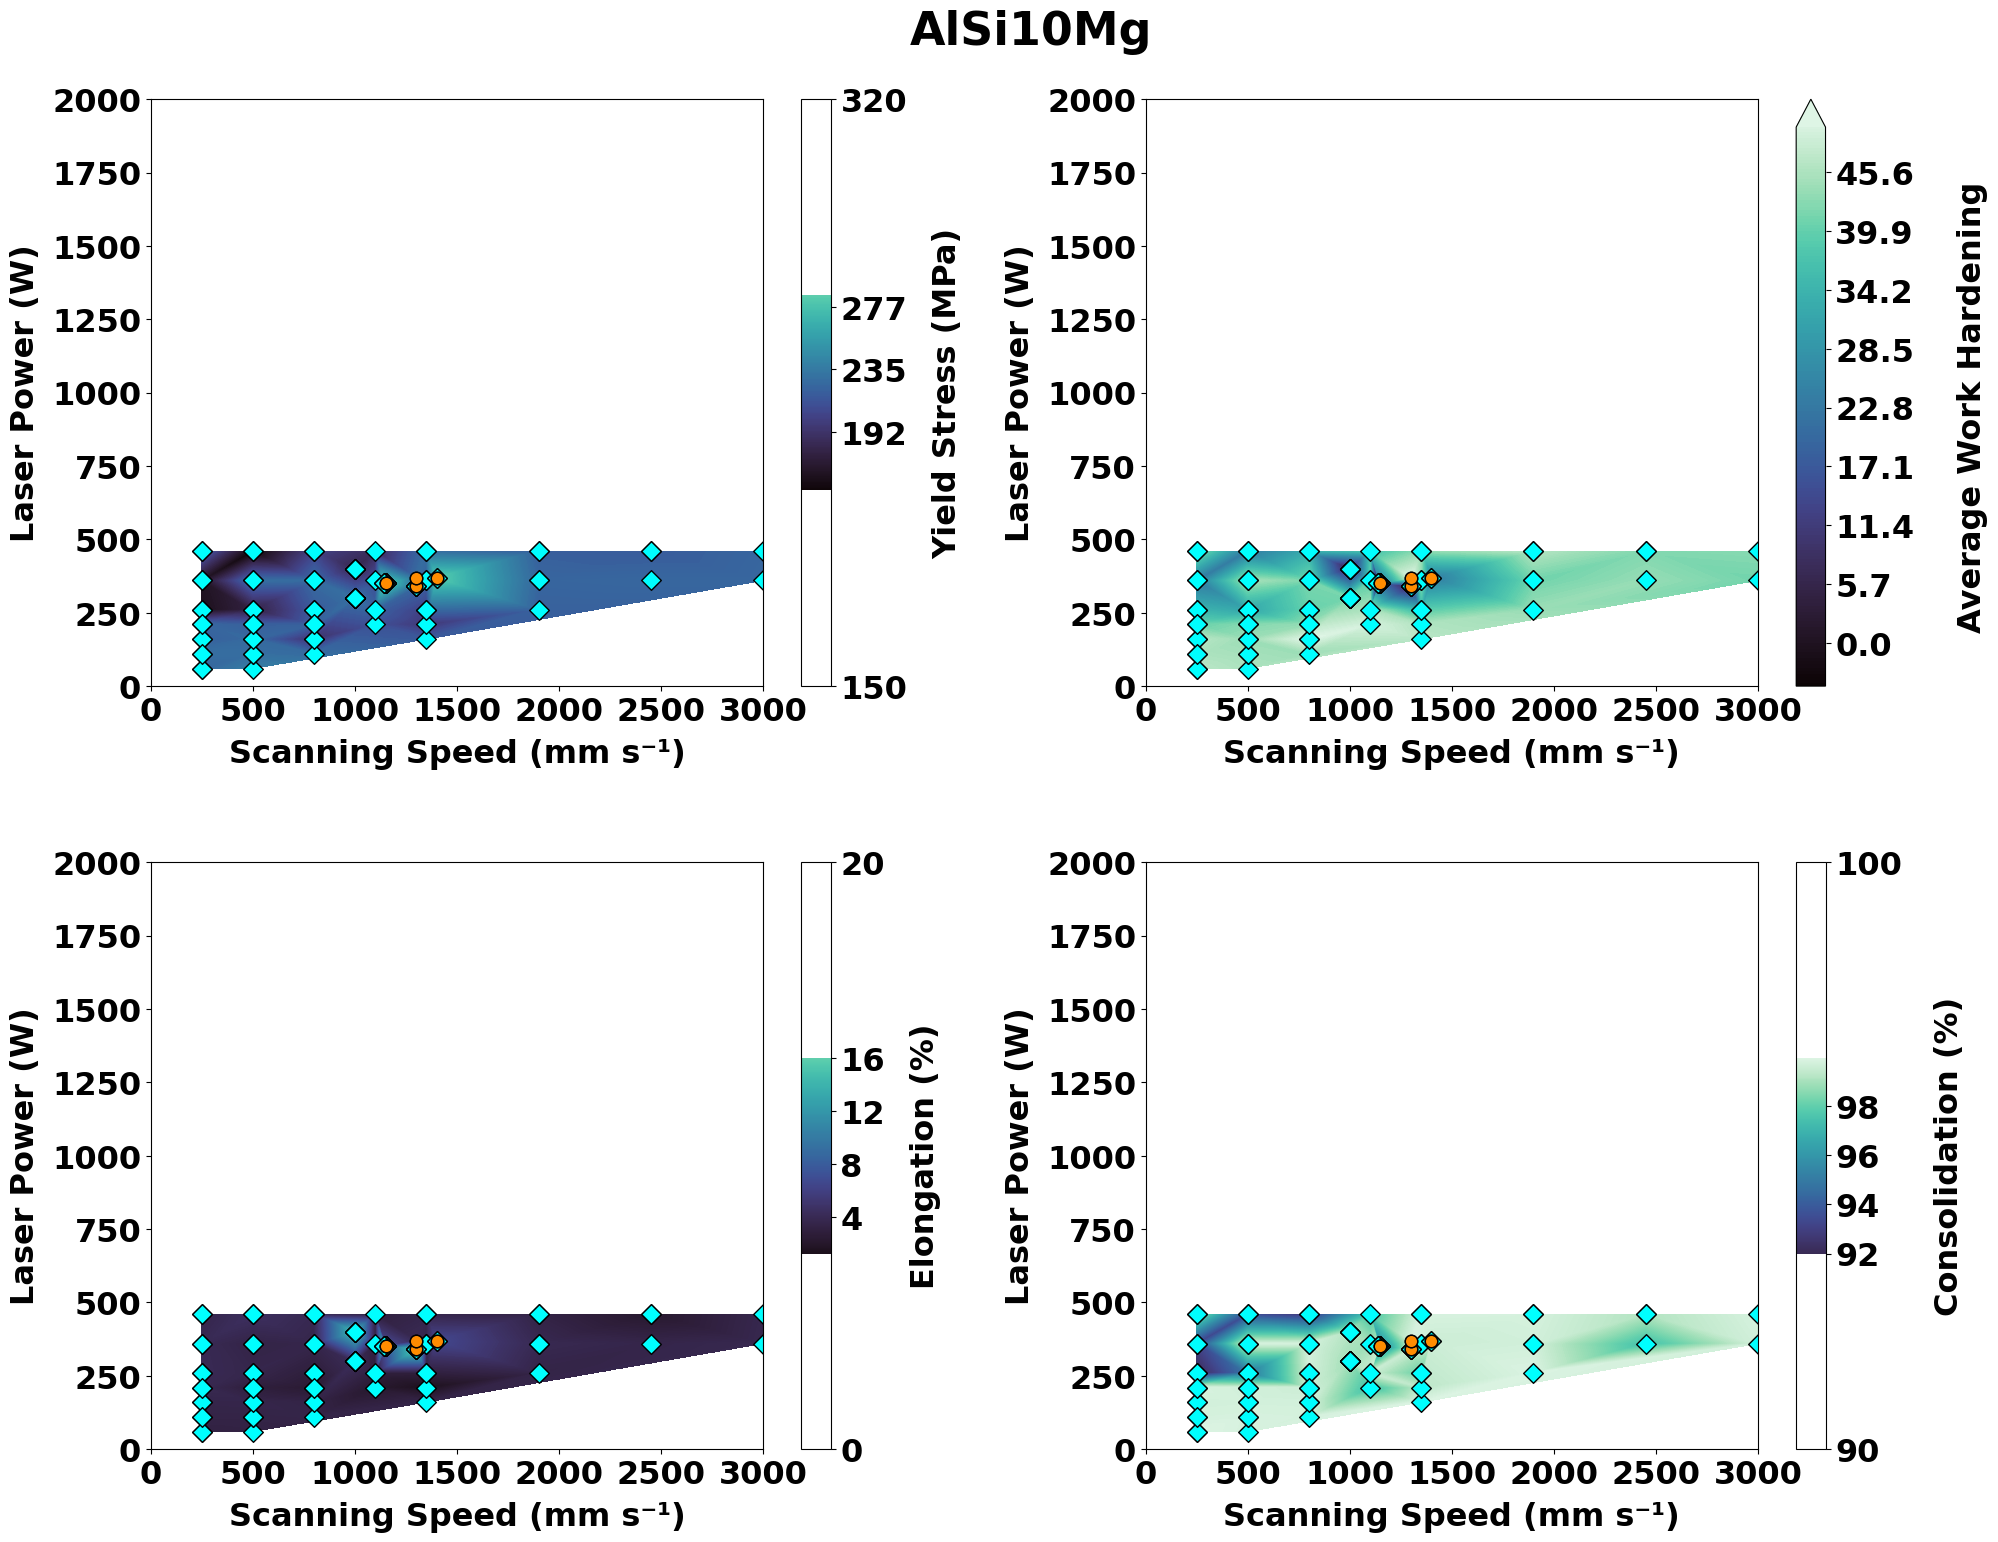

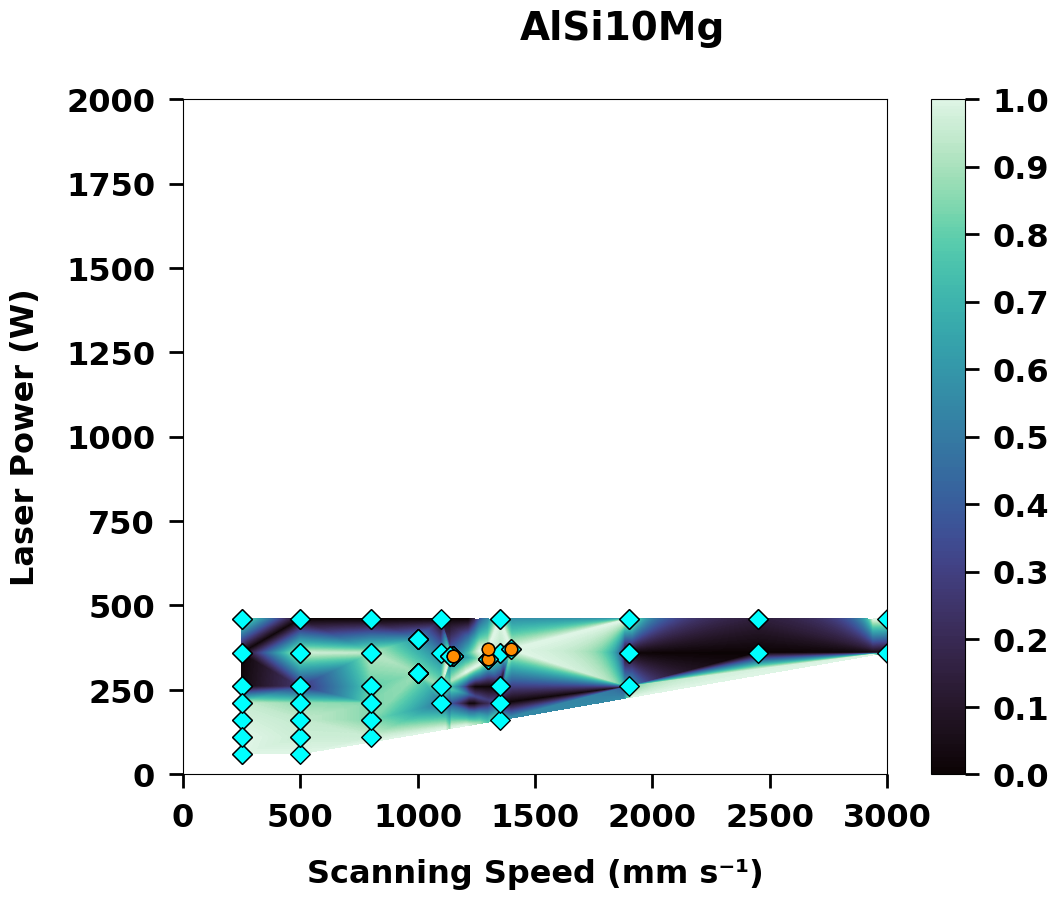

In [418]:
# Uses linear barycentric interpolation
method='linear'
# Number of contour levles for the heat map
level = 200
# Number of points on the grid
grid_points = 800
# Change sf_nt for non-treated Gaussian blur and sf_ht for heat treated Gaussian blur
gauss_cond = False
kernel = 7
# Change x y limits
x1_lim = 0
x2_lim = 3000
y1_lim = 0
y2_lim = 2000
f_size = 23
m_size = 80
alpha = 1
plt.rcParams.update({'font.size': f_size})
from matplotlib import rc,rcParams
rc('font', weight='bold')
# rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

# Iterate for all materials
# for n in range(len(materials_list)):
#     combined_process(n, kernel, gauss_cond, x1_lim, x2_lim, y1_lim, y2_lim, level, grid_points, method, material=materials_list[n], c1='darkorange', c2='cyan')

n = 3
combined_process(n, kernel, gauss_cond, x1_lim, x2_lim, y1_lim, y2_lim, level, grid_points, method, material=materials_list[n], c1='darkorange', c2='cyan')

In [326]:
# 316L
    # min_z = 200
    # max_z = 1200
    min2_z = 0
    max2_z = 50
    min3_z = 0
    max3_z = 100
    min4_z = 90
    max4_z = 100

# IN718
    min_z = 200
    max_z = 1200
    min2_z = 0
    max2_z = 50
    min3_z = 0
    max3_z = 65
    min4_z = 90
    max4_z = 100

# Ti6Al4V
    # min_z = 200
    # max_z = 1200
    min2_z = 0
    max2_z = 200
    min3_z = 0
    max3_z = 100
    min4_z = 90
    max4_z = 100

# AlSi10Mg
    # min_z = 200
    # max_z = 1200
    # min2_z = 0
    # max2_z = 200
    min3_z = 0
    max3_z = 20
    min4_z = 90
    max4_z = 100

# Consolidation Only

In [69]:
# Import excel data
path = r'/Users/rww21/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Year 3/Code/Data Analytics Paper/Process Parameters and Properties LPBF - New.xlsx'
dataset = pd.read_excel(path)

# Change treatment title - optional
# dataset.rename(columns={'Treated (HIP/Y/N)':'Treatment Information'}, inplace=True)
dataset.rename(columns={'Cell Spacing':'Cell Spacing (um)'}, inplace=True)
dataset.rename(columns={'Treated (HIP/Y/N)':'Treatment Information'}, inplace=True)
column_names = dataset.columns
# Change (um) to correct scientific symbol
dataset.columns = [str.replace('(um)', '(\u03BCm)') for str in column_names]
dataset = dataset.replace(r'\s+', np.nan, regex =True)
dataset

/var/folders/dr/88_11bqj7nv1y6zj8hs35g3m0000gp/T/ipykernel_51615/3941205184.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace(r'\s+', np.nan, regex =True)


,Material,Author's \nLast Name,Year,Link to paper,Manufacturer,Model,Printing Method,Method,Powder Size \nDistribution (μm),Laser Power (W),...,Test Temerature (℃).1,Stress/Strain Control,Max Stress/Strain,R value,Fatigue Life (Cycles),Test Temerature (℃).2,Average Work Hardening,Surface Roughness (μm),Error.6,Average Grain Size (μm)
0,IN718,NaN,2014.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,LPBF,NaN,NaN,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IN718,NaN,2014.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,LPBF,NaN,NaN,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IN718,NaN,2014.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,LPBF,NaN,NaN,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IN718,NaN,2014.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,LPBF,NaN,NaN,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IN718,Lu,2015.0,https://www.sciencedirect.com/science/article/...,NaN,NaN,LPBF,NaN,NaN,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,16.172107,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,316L,Yildiz,2024.0,https://doi.org/10.1016/j.mtcomm.2024.108168,NaN,NaN,LPBF,NaN,19-48,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.266667,NaN,NaN,NaN
4407,316L,Yildiz,2024.0,https://doi.org/10.1016/j.mtcomm.2024.108168,NaN,NaN,LPBF,NaN,19-48,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.525000,NaN,NaN,NaN
4408,316L,Yildiz,2024.0,https://doi.org/10.1016/j.mtcomm.2024.108168,NaN,NaN,LPBF,NaN,19-48,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.811111,NaN,NaN,NaN
4409,316L,Yildiz,2024.0,https://doi.org/10.1016/j.mtcomm.2024.108168,NaN,NaN,LPBF,NaN,19-48,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.627586,NaN,NaN,NaN


In [70]:
fontsize=25
column_names = dataset.columns
column_names

Index(['Material', 'Author's \nLast Name', 'Year', 'Link to paper',
       'Manufacturer', 'Model', 'Printing Method', 'Method',
       'Powder Size \nDistribution (μm)', 'Laser Power (W)',
       'Scanning Speed (mm/s)', 'Wire feeding speed (mm/min)',
       'Layer Thickness (μm)', 'Hatch Spacing (μm)', 'Beam size (μm)',
       'Focus Offset (mm)', 'Scanning strategy', 'layer rotation (degree)',
       'Island/Stripe size (mm)', 'Building Direction',
       'Build plate temperature (°C)', 'Width (μm)', 'Height (μm)',
       'Depth (μm)', 'Area', 'Linear energy density\n(J/m)',
       'Area energy density (J/mm2)', 'Volumetric energy density (J/mm3)',
       'Density measurement method', 'Consolidation (%)', 'Error',
       'Treatment Information', 'Temperature (°C)', 'Time (Hrs)',
       'Pressure (MPa)', 'Cooling', 'Temperature 2 (°C)', 'Time 2 (Hrs)',
       'Cooling.1', 'Temperature 3 (°C)', 'Time 3 (Hrs)', 'Cooling.2',
       'Temperature 4 (°C)', 'Time 4 (Hrs)', 'Cooling.3', 'Har

In [71]:
# Choose variables to consider (for input and output data)
x_var = ['Material',
         'Laser Power (W)',
         'Scanning Speed (mm/s)']

y_var = ['Consolidation (%)']

treat_var = ['Treatment Information']

# Obtains length of input and outputs
x_len = len(x_var)
y_len = len(y_var)

In [72]:
# Filter out data to specified materials
materials_list = ['316L', 'IN718', 'TI6Al4V', 'AlSi10Mg']
dataset = dataset[dataset['Material'].isin(materials_list)]
# Reset index
dataset = dataset.reset_index(drop=True)

# # Replace N and NaN values for treatment information as As Built
dataset.loc[dataset['Treatment Information'] == 'N', 'Treatment Information'] = 'As Built'
dataset['Treatment Information'] = dataset['Treatment Information'].fillna('As Built')
# Replace other treatment information 
dataset['Treatment Information'] = dataset['Treatment Information'].replace(['Y', 'SR', 'y'], 'Heat Treated')
# Filter out rows with 'HIP' in 'Treatment Information' column
dataset = dataset[dataset['Treatment Information'] != 'HIP']
# Filter dataframe to relevant columns only
dataset_copy = dataset[x_var + y_var + treat_var].copy()

dataset_copy

,Material,Laser Power (W),Scanning Speed (mm/s),Consolidation (%),Treatment Information
0,IN718,110.0,600.0,74.50,As Built
1,IN718,110.0,400.0,87.00,As Built
2,IN718,120.0,400.0,92.00,As Built
3,IN718,130.0,400.0,98.40,As Built
4,IN718,180.0,600.0,98.67,As Built
...,...,...,...,...,...
2687,316L,350.0,1700.0,98.08,As Built
2688,316L,100.0,1700.0,80.99,As Built
2689,316L,200.0,1700.0,92.21,As Built
2690,316L,350.0,1400.0,99.27,As Built


In [73]:
# Filter data to specified materials and interested treatment information
dataset = dataset_copy.copy()

# Store original sizes of data for reference
total_data = len(dataset)

# Dropna for method
dataset_combined = dataset.dropna()

# Iterative impute missing values as majority has multiple values but may be missing 1 property
# dataset = iterative_imputer(dataset).dropna()

# Save this data to dict
mat_dict_nt = {}
mat_dict_ht = {}
for material in materials_list:
    mat_dict_nt[f'material'] = dataset_combined[dataset_combined['Material'] == material]


dropped_data = len(dataset_combined)

print(f'Total data = {total_data}')
print(f'Data after dropna = {dropped_data}')

Total data = 2574
Data after dropna = 1825


In [74]:
dataset_combined

,Material,Laser Power (W),Scanning Speed (mm/s),Consolidation (%),Treatment Information
0,IN718,110.0,600.0,74.50,As Built
1,IN718,110.0,400.0,87.00,As Built
2,IN718,120.0,400.0,92.00,As Built
3,IN718,130.0,400.0,98.40,As Built
4,IN718,180.0,600.0,98.67,As Built
...,...,...,...,...,...
2687,316L,350.0,1700.0,98.08,As Built
2688,316L,100.0,1700.0,80.99,As Built
2689,316L,200.0,1700.0,92.21,As Built
2690,316L,350.0,1400.0,99.27,As Built


In [75]:
# Use to control x y limits
def contour_map(n, nt_kernel, ht_kernel, Gauss, scatter_points, x1_lim, x2_lim, y1_lim, y2_lim, level, grid_points, method, material):

    i=1
    j=0
    # Number of contour levles for the heat map
    levels = level
    # Gaussian blue kernal
    sf_nt = nt_kernel
    sf_ht = ht_kernel
    EXTENDS="neither"
    # Number of points on the grid
    z_grid=grid_points
    lwidth=0.8
    figsize = (22,18)
    cmap = sns.color_palette("mako", as_cmap=True)

    x_nt = dataset_combined[dataset_combined['Material']== material]['Scanning Speed (mm/s)'].tolist()
    y_nt = dataset_combined[dataset_combined['Material']== material]['Laser Power (W)'].tolist()
    z1_nt = dataset_combined[dataset_combined['Material']== material][y_var[0]].tolist()

    max_x = np.max(x_nt)
    min_x = np.min(x_nt)

    max_y = np.max(y_nt)
    min_y = np.min(y_nt)

    max_z = np.max(z1_nt)
    min_z = np.min(z1_nt)

    max_x = round(max_x/10)*10
    min_x = round(min_x/10)*10
    max_y = round(max_y/10)*10
    min_y = round(min_y/10)*10
    max_z = round(max_z/10)*10
    min_z = round(min_z/10)*10

    # Heatmaps for nt and ht
    v = np.linspace(min_z, max_z, 15, endpoint=True)

    # Create gridpoints so each space has a datapoint for interpolation
    x = np.linspace(min_x, max_x, z_grid)
    y = np.linspace(min_y, max_y, z_grid)
    xx, yy = np.meshgrid(x, y)



    # As Built Maps       
    # griddata to interpolate z data - method specifies type, can be nearest, linear, cubic etc.
    zi1_nt = griddata((x_nt, y_nt), z1_nt, (xx, yy), method=method)
    # Apply GaussianBlur
    if Gauss == True:
        zi1_nt = cv2.GaussianBlur(zi1_nt,(sf_nt,sf_nt),0)
    else:
        pass

    bounds = np.arange(99,100.001,0.01)
    # Plot first heatmap
    fig1 = plt.figure(figsize=figsize)
    ax1_nt = fig1.add_subplot(221)
    zi1_nt_clipped = np.clip(zi1_nt, 99, 100)
    cs = ax1_nt.contourf(xx, yy, zi1_nt_clipped, levels = bounds, extend='min', corner_mask=True, cmap=cmap, vmin=99, vmax=100)
    # Set colourbar and x, y limits
    # v = np.linspace(min_z, max_z, 15, endpoint=True, dtype='int')
    cbar = fig1.colorbar(cs, label=(f'{y_var[j]}'), ax=ax1_nt, ticks=bounds, extend='min')
    cbar.set_label(labelpad=18, label=(f'{y_var[j]}'), weight='bold')
    cbar.set_ticks(np.arange(99,100.1,0.2))  # Set colorbar ticks
    ax1_nt.set_xlim([x1_lim, x2_lim])
    ax1_nt.set_ylim([y1_lim, y2_lim])

    # Change units
    x_vars = x_var
    y_vars = y_var
    superscript_minus_one = "\u207B\u00B9"
    x_vars = [str.replace('(um)', '(\u03BCm)') for str in x_vars]
    x_vars = [item.replace("(mm/s)", f"(mm s{superscript_minus_one})") for item in x_vars]

    y_vars = [str.replace('(um)', '(\u03BCm)') for str in y_var]
    y_vars = [item.replace("(mm/s)", f"(mm s{superscript_minus_one})") for item in y_vars]

    # Set x, y axis titles
    ax1_nt.set_xlabel(x_vars[i+1], labelpad=8, weight='bold')
    ax1_nt.set_ylabel(x_vars[i], labelpad=8, weight='bold')
    fig1.subplots_adjust(left = 0.1, top = 0.85, right = 0.9, bottom = 0.1, hspace = 0.3, wspace = 0.3)


    
    if scatter_points == True:
        ax1_nt.scatter(x_nt, y_nt, marker='x', color='r', s=m_size, alpha=alpha, edgecolors='black')
        fig1.savefig(f'Figures/Process Maps/Consolidation_Scatter_As_Built_{material}.png',dpi=300, bbox_inches = "tight")
    else:
        fig1.savefig(f'Figures/Process Maps/Consolidation_As_Built_{material}.png',dpi=300, bbox_inches = "tight")

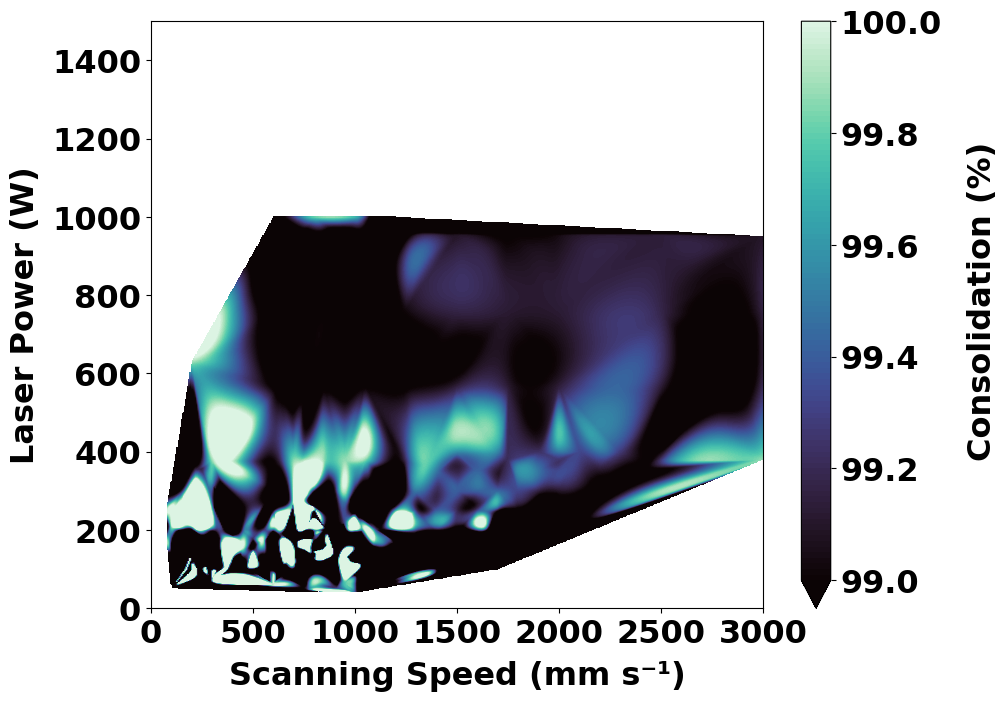

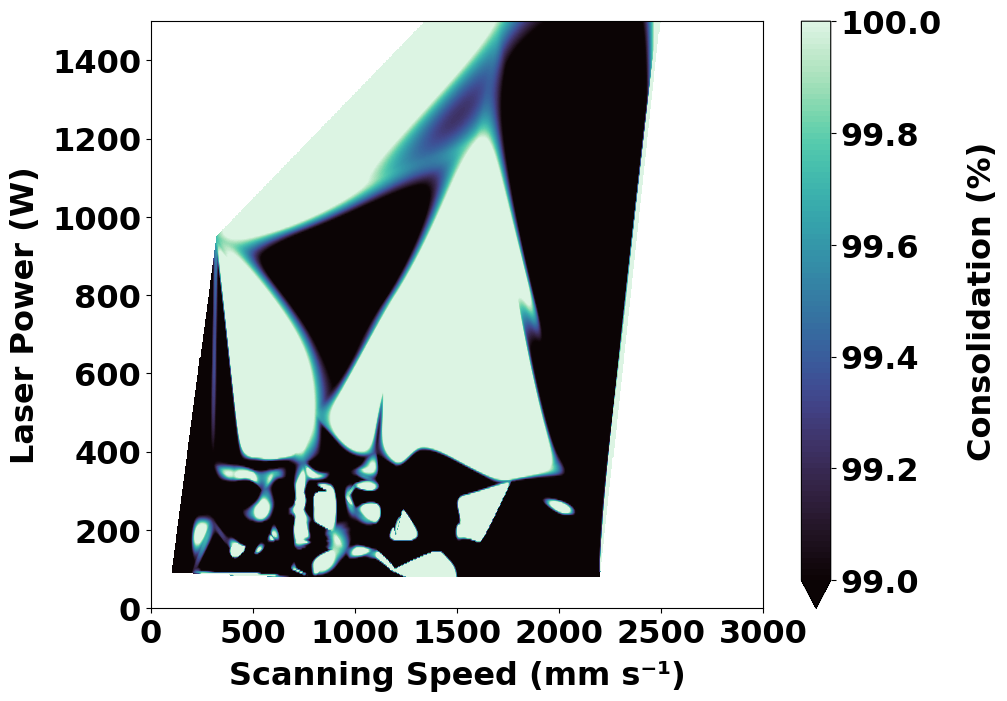

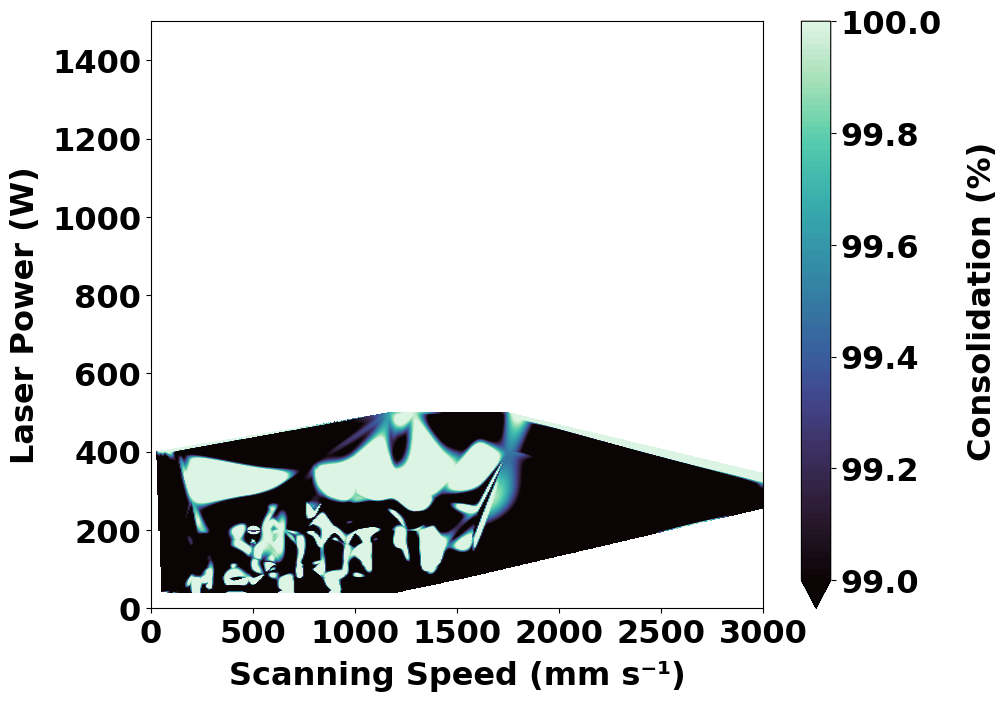

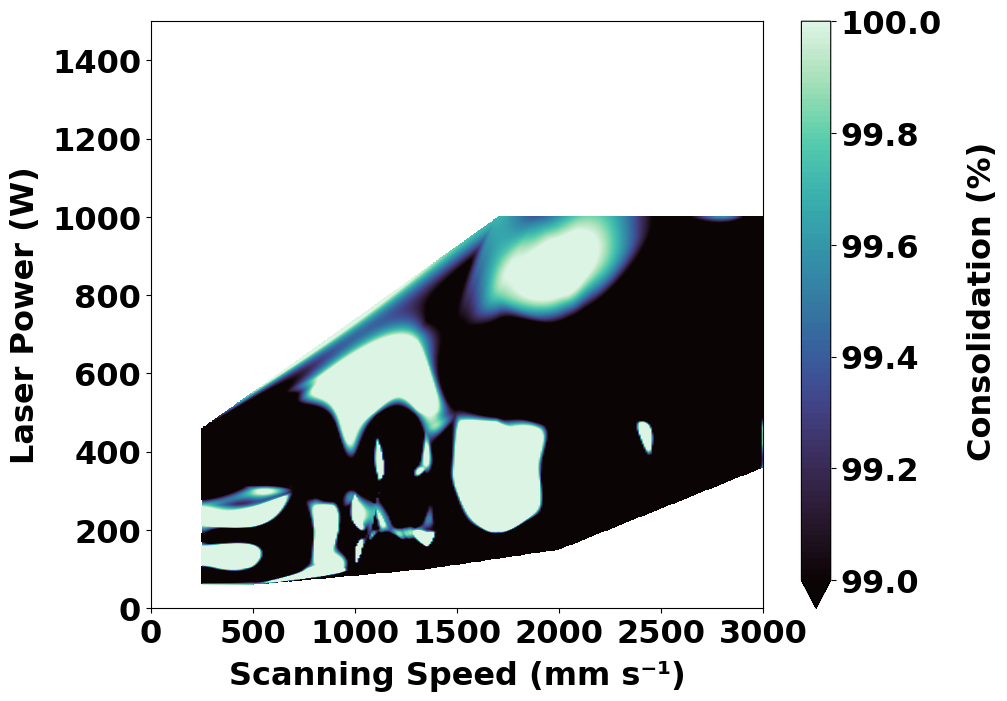

In [76]:
# Uses linear barycentric interpolation
method='cubic'
# Number of contour levles for the heat map
level = 100
# Number of points on the grid
grid_points = 500
# Change sf_nt for non-treated Gaussian blur and sf_ht for heat treated Gaussian blur
gauss_cond = False
scatter_cond = False
nt_kernel = 15
ht_kernel = 15
# Change x y limits
x1_lim = 0
x2_lim = 3000
y1_lim = 0
y2_lim = 1500
f_size = 23
m_size = 35
plt.rcParams.update({'font.size': f_size})
from matplotlib import rc,rcParams
rc('font', weight='bold')
# rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

# Iterate for all materials
for n in range(len(materials_list)):
    contour_map(n, nt_kernel, ht_kernel, gauss_cond, scatter_cond, x1_lim, x2_lim, y1_lim, y2_lim, level, grid_points, method, material=materials_list[n])

# n = 3
# contour_map(n, nt_kernel, ht_kernel, gauss_cond, scatter_cond, x1_lim, x2_lim, y1_lim, y2_lim, level, grid_points, method, material=materials_list[n])